## <center>Model Training




## Importing Libraries


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import regularizers

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
IMAGE_SIZE = [224,224]
resnet = ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(resnet.output)
pred = Dense(5,activation='softmax')(x)

In [ ]:
from keras import Model
model = Model(inputs=resnet.input,outputs = pred)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=20,
                        preprocessing_function=preprocess_input)

In [ ]:
!unzip "/content/drive/My Drive/Dataset.zip" -d "/content"

Archive:  /content/drive/My Drive/Dataset.zip
   creating: /content/Dataset/Mild/
  inflating: /content/Dataset/Mild/0024cdab0c1e.png  
  inflating: /content/Dataset/Mild/00cb6555d108.png  
  inflating: /content/Dataset/Mild/0124dffecf29.png  
  inflating: /content/Dataset/Mild/01b3aed3ed4c.png  
  inflating: /content/Dataset/Mild/0369f3efe69b.png  
  inflating: /content/Dataset/Mild/03e25101e8e8.png  
  inflating: /content/Dataset/Mild/04ac765f91a1.png  
  inflating: /content/Dataset/Mild/059bc89df7f4.png  
  inflating: /content/Dataset/Mild/05a5183c92d0.png  
  inflating: /content/Dataset/Mild/0684311afdfc.png  
  inflating: /content/Dataset/Mild/06b71823f9cd.png  
  inflating: /content/Dataset/Mild/07929d32b5b3.png  
  inflating: /content/Dataset/Mild/07a1c7073982.png  
  inflating: /content/Dataset/Mild/086d41d17da8.png  
  inflating: /content/Dataset/Mild/09935d72892b.png  
  inflating: /content/Dataset/Mild/0a3202889f4d.png  
  inflating: /content/Dataset/Mild/0a61bddab956.png  


In [ ]:
DIR = "Dataset"

In [ ]:
train = gen.flow_from_directory(DIR,target_size=IMAGE_SIZE,batch_size=32)

Found 4968 images belonging to 5 classes.


In [ ]:
r = model.fit_generator(train,
                       epochs=30,
                       steps_per_epoch=150,
                       verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
150/150 [==============================] - 58s 386ms/step - loss: 6.7125 - accuracy: 0.6235
Epoch 2/30
150/150 [==============================] - 59s 393ms/step - loss: 5.1823 - accuracy: 0.7104
Epoch 3/30
150/150 [==============================] - 59s 395ms/step - loss: 5.5644 - accuracy: 0.7341
Epoch 4/30
150/150 [==============================] - 58s 389ms/step - loss: 3.8960 - accuracy: 0.7822
Epoch 5/30
150/150 [==============================] - 59s 394ms/step - loss: 4.1789 - accuracy: 0.7797
Epoch 6/30
150/150 [==============================] - 60s 398ms/step - loss: 3.5384 - accuracy: 0.8038
Epoch 7/30
150/150 [==============================] - 59s 395ms/step - loss: 3.9253 - accuracy: 0.7988
Epoch 8/30
150/150 [==============================] - 59s 394ms/step - loss: 3.1195 - accuracy: 0.8346
Epoch 9/30
150/150 [==============================] - 60s 398ms/step - loss: 3.1533 - accuracy: 0.83

In [ ]:
model.save('/content/drive/My Drive/resnet50_augmented.h5')

In [ ]:
import matplotlib.pyplot as plt

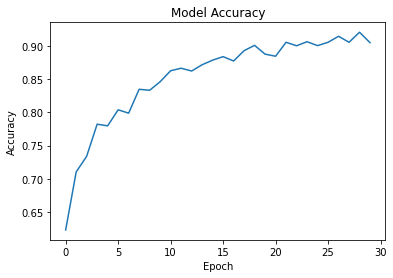

In [ ]:
plt.plot(r.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

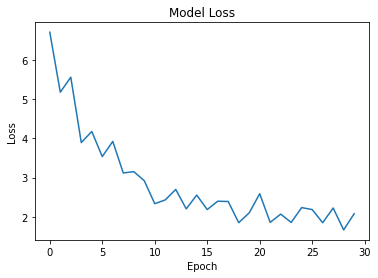

In [ ]:
plt.plot(r.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()